In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr , spearmanr

sns.set_theme(style='darkgrid')

# Set values to be used in machine learning model

In [57]:
kentucky = pd.read_csv('kentucky.csv')

kentucky = kentucky.rename(columns={'year' : 'Year',
                                                  'county' : 'County',
                                                  'state' : 'State',
                                                  'povrate' : 'Poverty Rate',
                                                  'wagesal_percap' : 'Wages and Salary per Capita',
                                                  'trans_gov_pc' : 'Government Transfers per Capita',
                                                  'trans_medicare_pc' : 'Medicare Transfers per Capita',
                                                  'oldfrac' : 'Share of Population 65+',
                                                  'totalpop' : 'Total Population',
                                                  'trans_medicaid_pc' : 'Medicaid Transfers per Capita',
                                                  'unemprate' : 'Unemployment Rate'})

In [58]:
kentucky.head(15)

,Year,County,State,Poverty Rate,Wages and Salary per Capita,Government Transfers per Capita,Medicare Transfers per Capita,Share of Population 65+,Total Population,Medicaid Transfers per Capita,Unemployment Rate
0,2015,"Jefferson County, KY",21,15.4,33.507957,9.084407,2.130403,0.149360,764946,2.096687,4.8
1,2010,"Bullitt County, KY",21,10.5,8.515895,7.242966,1.688295,0.112443,74500,0.711899,10.6
2,2003,"Henry County, KY",21,12.7,8.604240,5.768100,1.374146,0.124844,15259,0.952066,5.3
3,2005,"Oldham County, KY",21,5.0,10.085989,3.747598,0.786488,0.075646,54266,0.595427,4.8
4,2009,"Oldham County, KY",21,5.9,9.899155,5.031501,1.107172,0.088880,59777,0.634520,8.3
5,2014,"Jefferson County, KY",21,16.8,31.422703,8.674019,2.055432,0.145697,761725,1.854879,6.0
6,2006,"Henry County, KY",21,15.4,8.485260,6.488068,1.759632,0.131373,15475,1.020675,5.7
7,2007,"Shelby County, KY",21,13.3,15.036273,5.282291,1.366415,0.114020,40335,0.643202,4.7
8,2002,"Bullitt County, KY",21,NaN,6.740033,4.353430,0.754777,0.081396,63775,0.683760,5.2
9,2019,"Jefferson County, KY",21,14.2,35.990448,9.287062,2.294696,0.166599,766757,1.991303,4.0


In [59]:
kentucky.shape

(2160, 11)

# Clean Data and set datetime and fill void values

In [60]:
kentucky.drop(kentucky[kentucky['Year'] == '2002'].index, inplace=True)

In [61]:
kentucky['Date'] = pd.to_datetime(kentucky['Year'], format='%Y')

kentucky.drop('Year', inplace=True, axis=1)

kentucky = kentucky.fillna(kentucky['Poverty Rate'].mean())

# Create Poverty Rate Average from 2003 - 2019

In [62]:
kentucky_mean_pov = kentucky['Poverty Rate'].mean()
kentucky['Above Average Poverty Mean'] = (kentucky['Poverty Rate'] - kentucky_mean_pov) > 0

In [63]:
kentucky.sample(15)

,County,State,Poverty Rate,Wages and Salary per Capita,Government Transfers per Capita,Medicare Transfers per Capita,Share of Population 65+,Total Population,Medicaid Transfers per Capita,Unemployment Rate,Date,Above Average Poverty Mean
1689,"Knox County, KY",21,38.600000,9.299476,11.826128,2.438628,0.143170,31920,2.864445,11.6,2009-01-01,True
1129,"Magoffin County, KY",21,29.400000,5.844820,12.416527,2.333515,0.129941,13306,3.342027,20.5,2010-01-01,True
1741,"Mason County, KY",21,19.500000,23.501537,10.064374,2.587510,0.171496,17050,2.105448,6.2,2015-01-01,False
1797,"Owsley County, KY",21,39.200000,4.613943,17.410946,2.839502,0.194680,4474,8.237612,7.4,2018-01-01,True
1585,"Rockcastle County, KY",21,26.800000,6.690953,7.994990,1.853283,0.144456,16974,2.022249,6.8,2006-01-01,True
1562,"Madison County, KY",21,19.200000,14.061593,7.369233,1.564485,0.110427,82299,1.102783,9.1,2009-01-01,False
722,"Carlisle County, KY",21,13.400000,4.992926,7.759934,2.019303,0.187417,5261,1.227233,7.4,2004-01-01,False
1950,"Taylor County, KY",21,18.500000,14.846319,8.036331,1.884355,0.155967,23755,1.657012,5.3,2005-01-01,False
257,"Scott County, KY",21,11.300000,23.704454,5.770852,1.162368,0.093455,47274,0.635179,8.7,2010-01-01,False
859,"Edmonson County, KY",21,20.430784,4.273757,6.199005,1.175362,0.145371,11763,1.332613,7.1,2002-01-01,False


# Vizulazations for Poverty Rate in relation to values

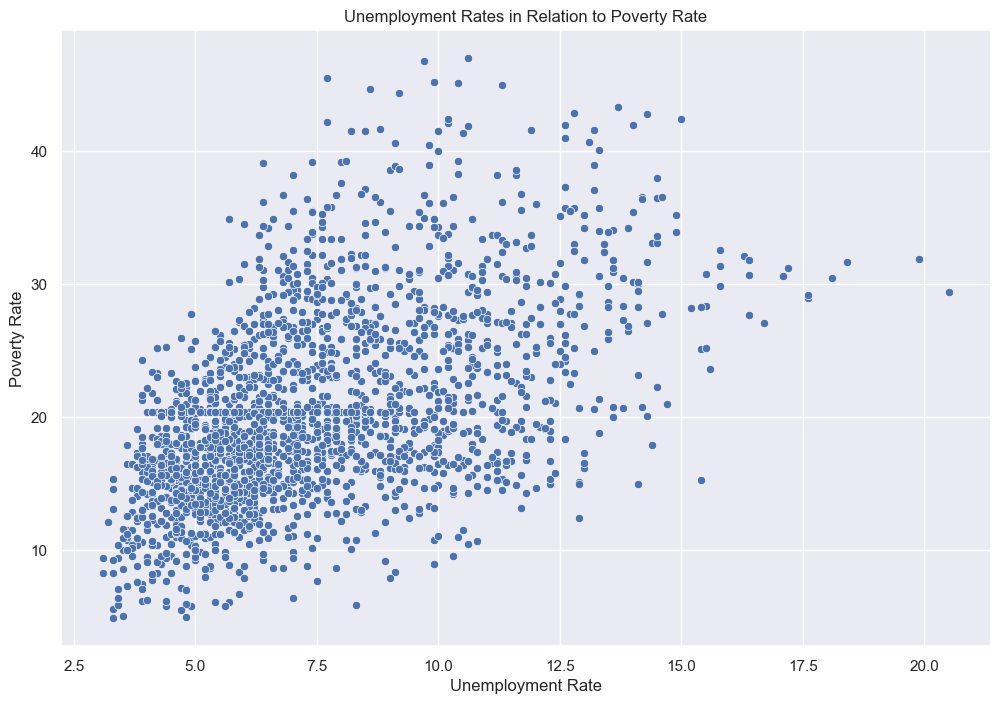

In [87]:
plt.figure(figsize=(12,8))

sns.scatterplot(x= 'Unemployment Rate',
                y= 'Poverty Rate',
                data= kentucky)
plt.title('Unemployment Rates in Relation to Poverty Rate')

plt.show()

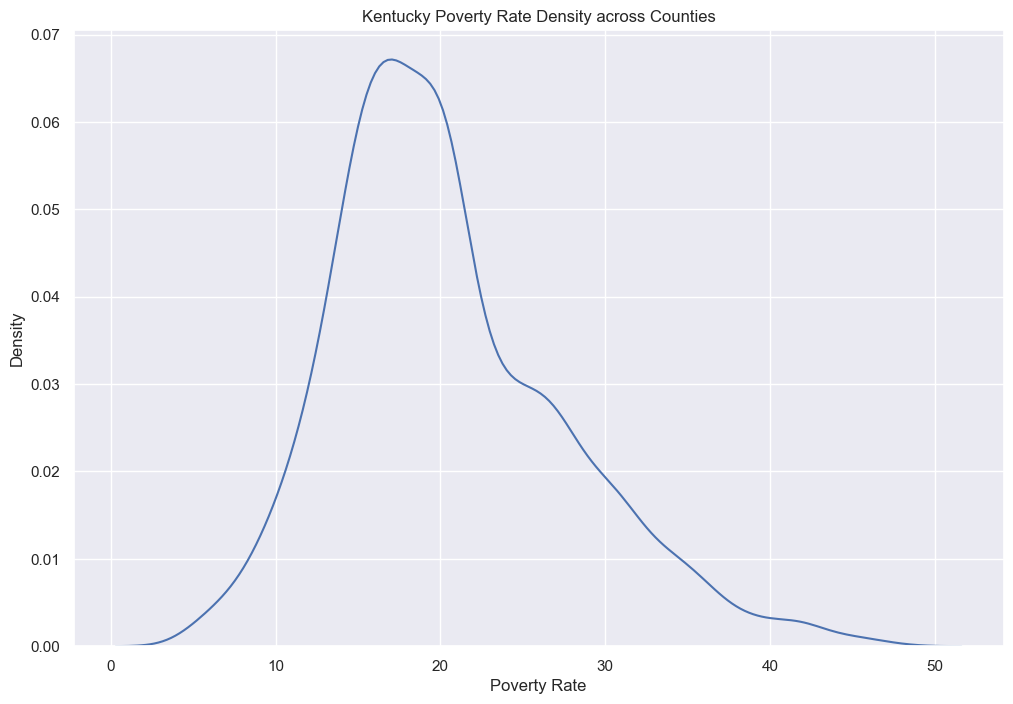

In [76]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= 'Poverty Rate',
            data= kentucky,
             shade=False)

plt.title('Kentucky Poverty Rate Density across Counties')

plt.show()

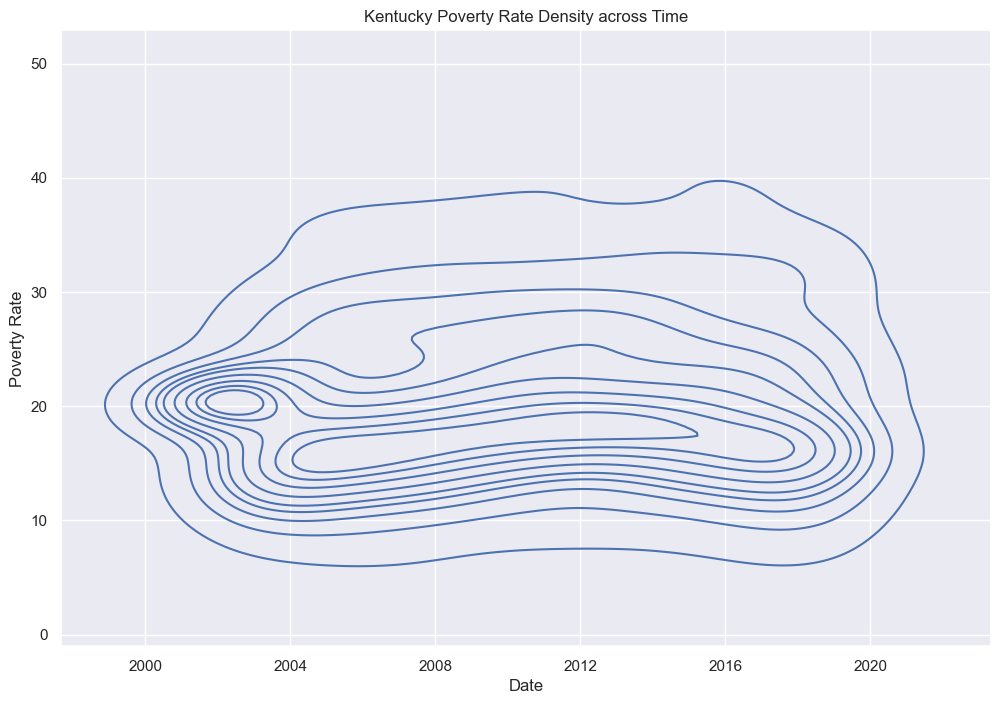

In [77]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= 'Date',
            y= 'Poverty Rate',
            data= kentucky,
             shade=False)

plt.title('Kentucky Poverty Rate Density across Time')

plt.show()

# Create readable values for machine learning model

In [67]:
pov_map = {True : 1, False : 0}

kentucky['Above Average Poverty Mean'] = kentucky['Above Average Poverty Mean'].map(pov_map)

In [68]:
num_true_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])
num_false_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])

print("Number of True cases for Kentucky: {0} ({1:2.2f}%)".format(num_true_kentucky, (num_true_kentucky/ (num_true_kentucky + num_false_kentucky)) * 100))
print("Number of False cases for Kentucky: {0} ({1:2.2f}%)".format(num_false_kentucky, (num_false_kentucky/ (num_true_kentucky + num_false_kentucky)) * 100))

Number of True cases for Kentucky: 839 (38.84%)
Number of False cases for Kentucky: 1321 (61.16%)


# Split the data for learning model and testing model

In [69]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Wages and Salary per Capita', 'Government Transfers per Capita', 'Medicare Transfers per Capita', 'Share of Population 65+', 'Total Population', 'Medicaid Transfers per Capita', 'Unemployment Rate']
predicted_class_name = ['Above Average Poverty Mean']

X = kentucky[feature_col_names].values
y = kentucky[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [70]:
print("{0:0.2f}% in training set".format((len(X_train)/len(kentucky.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(kentucky.index)) * 100))

70.00% in training set
30.00% in test set


In [71]:
print("Original True  : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])/len(kentucky.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])/len(kentucky.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 839 (38.84%)
Original False : 1321 (61.16%)

Training True  : 595 (39.35%)
Training False : 917 (60.65%)

Test True      : 244 (37.65%)
Test False     : 404 (62.35%)


# Naive Bayes Model application

In [72]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [73]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.6442


In [74]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.6420


In [75]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[191 213]
 [ 19 225]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       404
           1       0.51      0.92      0.66       244

    accuracy                           0.64       648
   macro avg       0.71      0.70      0.64       648
weighted avg       0.76      0.64      0.64       648

